In [ ]:
#installing dependencies
import pandas as pd
import seaborn as sns
import numpy as np

In [80]:
df = pd.read_csv(r'C:\Tasks\Work\Data Analysis\Forage projects\BA reviews python\customer_booking.csv')


In [81]:
df.head

<bound method NDFrame.head of        num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49995               2      Internet  RoundTrip             27               6   
49996               1      Internet  RoundTrip            111               6   
49997               1      Internet  RoundTrip             24               6   
49998               1      Internet  RoundTrip             15               6   
49999               1      Internet  RoundTrip             19               6  

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

num_passengers = number of passengers travelling
sales_channel = sales channel booking was made on
trip_type = trip Type (Round Trip, One Way, Circle Trip)
purchase_lead = number of days between travel date and booking date
length_of_stay = number of days spent at destination
flight_hour = hour of flight departure
flight_day = day of week of flight departure
route = origin -> destination flight route
booking_origin = country from where booking was made
wants_extra_baggage = if the customer wanted extra baggage in the booking
wants_preferred_seat = if the customer wanted a preferred seat in the booking
wants_in_flight_meals = if the customer wanted in-flight meals in the booking
flight_duration = total duration of flight (in hours)
booking_complete = flag indicating if the customer completed the booking

In [27]:
import datetime 

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [24]:
#finding the correlation between columns
df.corr()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.212606,-0.115850,0.015607,0.120404,0.028544,0.022943,-0.063169,0.024116
purchase_lead,0.212606,1.000000,-0.076560,0.035973,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.076560,1.000000,-0.024872,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.035973,-0.024872,1.000000,-0.011434,0.012171,0.013014,-0.002101,0.007127
wants_extra_baggage,0.120404,-0.022207,0.176757,-0.011434,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.028544,-0.004499,0.032264,0.012171,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.022943,-0.022653,0.098828,0.013014,0.216470,0.315088,1.000000,0.154312,0.026511
flight_duration,-0.063169,0.067866,0.141181,-0.002101,0.057054,0.101289,0.154312,1.000000,-0.106266
booking_complete,0.024116,-0.022131,-0.042408,0.007127,0.068139,0.050116,0.026511,-0.106266,1.000000


In [39]:
df['sales_channel']=df['sales_channel'].astype('category').cat.codes
df['booking_complete']=df['booking_complete'].astype('category').cat.codes
df.corr()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,-0.002457,0.212606,-0.115850,0.015607,0.120404,0.028544,0.022943,-0.063169,0.024116
sales_channel,-0.002457,1.000000,-0.013399,-0.060352,0.022375,-0.054254,0.032943,-0.022235,-0.038629,-0.041060
purchase_lead,0.212606,-0.013399,1.000000,-0.076560,0.035973,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.060352,-0.076560,1.000000,-0.024872,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.022375,0.035973,-0.024872,1.000000,-0.011434,0.012171,0.013014,-0.002101,0.007127
wants_extra_baggage,0.120404,-0.054254,-0.022207,0.176757,-0.011434,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.028544,0.032943,-0.004499,0.032264,0.012171,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.022943,-0.022235,-0.022653,0.098828,0.013014,0.216470,0.315088,1.000000,0.154312,0.026511
flight_duration,-0.063169,-0.038629,0.067866,0.141181,-0.002101,0.057054,0.101289,0.154312,1.000000,-0.106266
booking_complete,0.024116,-0.041060,-0.022131,-0.042408,0.007127,0.068139,0.050116,0.026511,-0.106266,1.000000


Text(0.5, 1.0, 'flight_duration vs booking_complete')

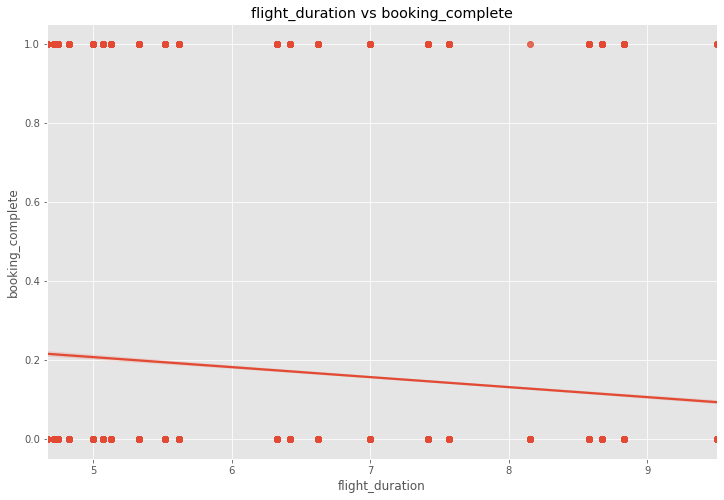

In [37]:
sns.regplot(x='flight_duration',y='booking_complete',data=df)
plt.title('flight_duration vs booking_complete')

Text(0.5, 1.0, 'purchase_lead vs booking_complete')

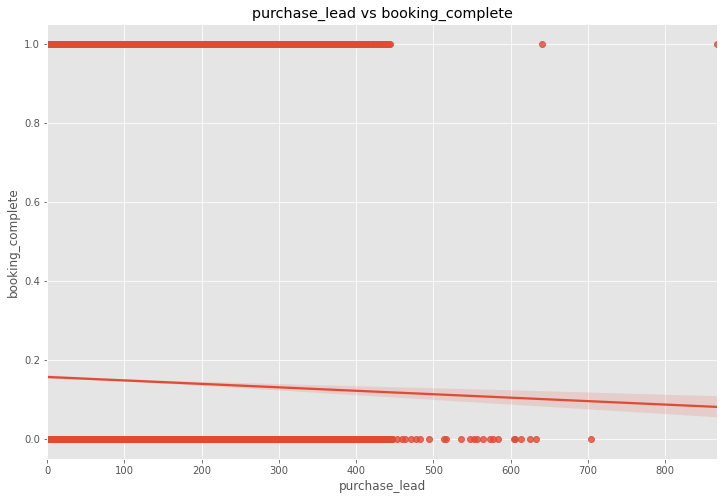

In [40]:
sns.regplot(x='purchase_lead',y='booking_complete',data=df)
plt.title('purchase_lead vs booking_complete')

In [ ]:
plt.scatter(x=df['purchase_lead'],y=df['booking_complete'])
plt.xlabel("totalsteps")
plt.ylabel("calories")
plt.title("totalsteps vs calories")
plt.show()

In [46]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,2,720,4,1,0,1,5.62,0
49996,1,0,2,111,6,4,3,720,4,0,0,0,5.62,0
49997,1,0,2,24,6,22,2,720,4,0,0,1,5.62,0
49998,1,0,2,15,6,11,1,720,4,1,0,1,5.62,0


Text(0.5, 1.0, 'sales_channel vs booking_complete')

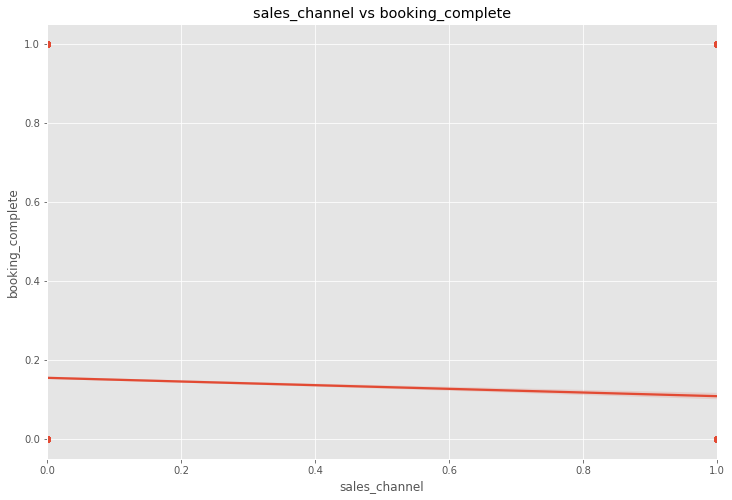

In [41]:
import datetime 

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

sns.regplot(x='sales_channel',y='booking_complete',data=df)
plt.title('sales_channel vs booking_complete')

In [42]:
#numerizing all the columns into numbers
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,2,720,4,1,0,1,5.62,0
49996,1,0,2,111,6,4,3,720,4,0,0,0,5.62,0
49997,1,0,2,24,6,22,2,720,4,0,0,1,5.62,0
49998,1,0,2,15,6,11,1,720,4,1,0,1,5.62,0


Text(0.5, 1.0, 'heatmap of correlation')

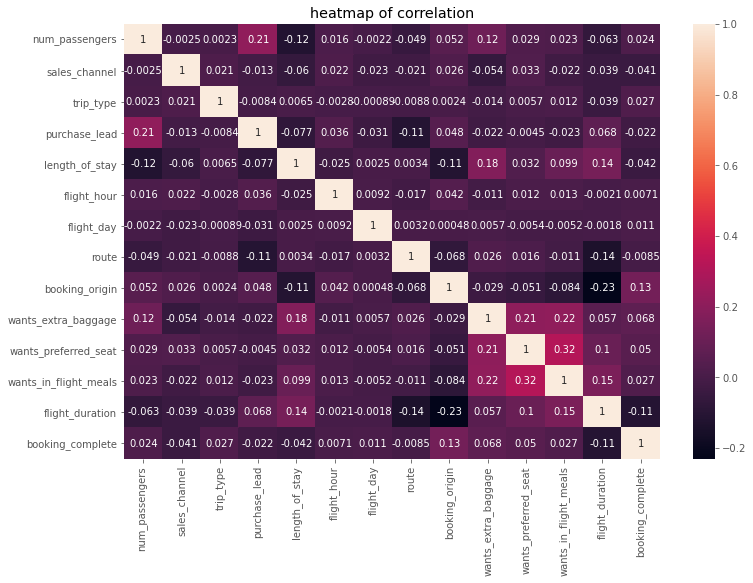

In [43]:
#classifying the correlation between columns
sns.heatmap(df_numerized.corr(),annot=True)
plt.title('heatmap of correlation')

In [45]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,2,720,4,1,0,1,5.62,0
49996,1,0,2,111,6,4,3,720,4,0,0,0,5.62,0
49997,1,0,2,24,6,22,2,720,4,0,0,1,5.62,0
49998,1,0,2,15,6,11,1,720,4,1,0,1,5.62,0


In [85]:
df_internet = df.where(df["sales_channel"] == "Internet")
df_internet

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2.0,Internet,RoundTrip,262.0,19.0,7.0,Sat,AKLDEL,New Zealand,1.0,0.0,0.0,5.52,0.0
1,1.0,Internet,RoundTrip,112.0,20.0,3.0,Sat,AKLDEL,New Zealand,0.0,0.0,0.0,5.52,0.0
2,2.0,Internet,RoundTrip,243.0,22.0,17.0,Wed,AKLDEL,India,1.0,1.0,0.0,5.52,0.0
3,1.0,Internet,RoundTrip,96.0,31.0,4.0,Sat,AKLDEL,New Zealand,0.0,0.0,1.0,5.52,0.0
4,2.0,Internet,RoundTrip,68.0,22.0,15.0,Wed,AKLDEL,India,1.0,0.0,1.0,5.52,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2.0,Internet,RoundTrip,27.0,6.0,9.0,Sat,PERPNH,Australia,1.0,0.0,1.0,5.62,0.0
49996,1.0,Internet,RoundTrip,111.0,6.0,4.0,Sun,PERPNH,Australia,0.0,0.0,0.0,5.62,0.0
49997,1.0,Internet,RoundTrip,24.0,6.0,22.0,Sat,PERPNH,Australia,0.0,0.0,1.0,5.62,0.0
49998,1.0,Internet,RoundTrip,15.0,6.0,11.0,Mon,PERPNH,Australia,1.0,0.0,1.0,5.62,0.0


<AxesSubplot:ylabel='sales_channel'>

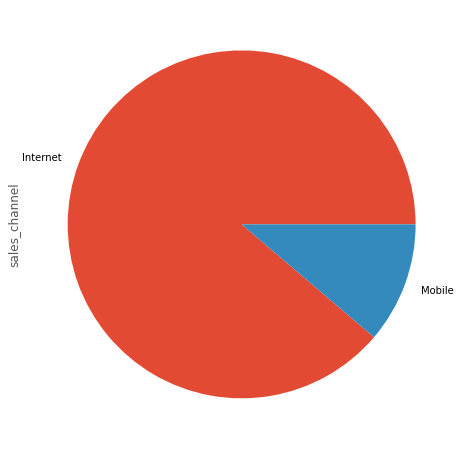

In [87]:
df["sales_channel"].value_counts(dropna=False).plot(kind="pie")

In [104]:
filter = df['sales_channel'] == "Mobile"
df_mobile=df[filter]
df_mobile

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0
45,1,Mobile,RoundTrip,221,61,2,Sun,AKLICN,New Zealand,0,0,0,6.62,0
78,1,Mobile,CircleTrip,281,18,3,Wed,AKLKTM,New Zealand,1,0,0,4.75,0
90,1,Mobile,RoundTrip,63,57,8,Mon,AKLKUL,New Zealand,0,0,0,8.83,0
100,1,Mobile,RoundTrip,57,21,1,Sun,AKLKUL,Malaysia,1,1,1,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49939,1,Mobile,RoundTrip,216,6,10,Thu,PENTPE,Taiwan,1,0,0,4.67,0
49957,1,Mobile,RoundTrip,9,6,15,Mon,PENTPE,Malaysia,1,0,0,4.67,0
49958,4,Mobile,RoundTrip,108,6,16,Mon,PENTPE,Malaysia,1,0,1,4.67,0
49971,2,Mobile,RoundTrip,38,6,1,Sat,PENTPE,Malaysia,0,0,1,4.67,1


In [96]:
filter = df['sales_channel'] == "Internet"
df_internet=df[filter]
df_internet

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


<AxesSubplot:title={'center':'Internet'}, ylabel='booking_complete'>

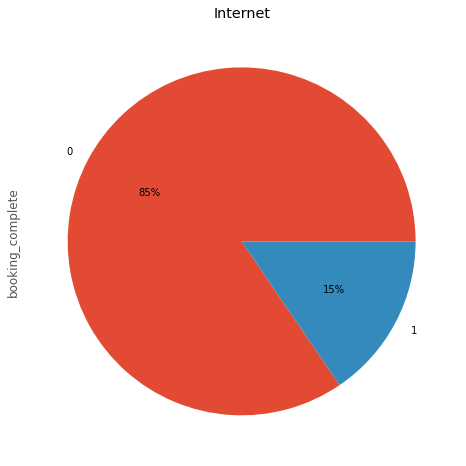

In [102]:
df_internet["booking_complete"].value_counts(dropna=False).plot(kind="pie",autopct='%1.0f%%',title="Internet")

<AxesSubplot:title={'center':'Mobile'}, ylabel='booking_complete'>

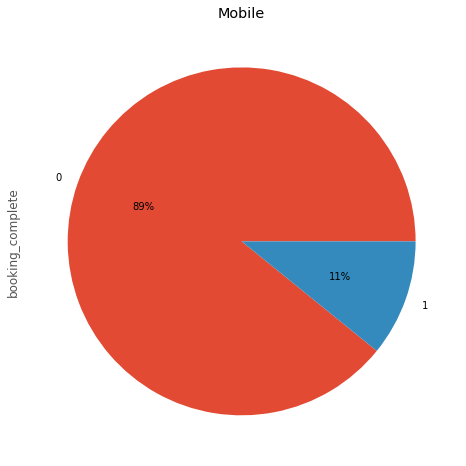

In [105]:
df_mobile["booking_complete"].value_counts(dropna=False).plot(kind="pie",autopct='%1.0f%%',title="Mobile")

In [103]:
df_mobile

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


<AxesSubplot:ylabel='booking_complete'>

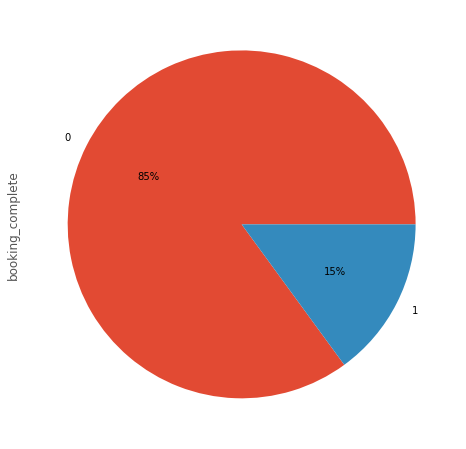

In [98]:
df["booking_complete"].value_counts(dropna=False).plot(kind="pie",autopct='%1.0f%%')